In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os

import tensorflow as tf
import keras

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


from transformers import ViTForImageClassification
from transformers.keras_callbacks import PushToHubCallback
from tensorflow.keras.callbacks import TensorBoard as TensorboardCallback, EarlyStopping
from transformers import ViTFeatureExtractor
from transformers import DefaultDataCollator

from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from transformers import ViTImageProcessor
import torch
from torch import nn
from torchvision import transforms
from torch.utils.data import TensorDataset, DataLoader


from datasets import load_metric
from datasets import Dataset
from transformers import ViTForImageClassification
from transformers import TrainingArguments
from transformers import Trainer

# Loading + Preprocessing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
!unzip /content/drive/MyDrive/DATA_207/cifake.zip

In [ ]:
dataset_dir = "train"
img_height = 32
img_width = 32
batch_size = 500

# Load training and validation data
train_ds, val_ds = keras.utils.image_dataset_from_directory(
  os.path.join(dataset_dir, ""),
  validation_split=0.2,
  subset="both",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = 80000)

Found 100000 files belonging to 2 classes.
Using 80000 files for training.
Using 20000 files for validation.


In [ ]:
test_ds = keras.utils.image_dataset_from_directory(
  os.path.join("test"),
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = 20000)

Found 20000 files belonging to 2 classes.


In [ ]:
classes = train_ds.class_names
classes

['FAKE', 'REAL']

In [ ]:
train_list = list(train_ds)
train_imgs = train_list[0][0].numpy()
train_labels = train_list[0][1].numpy()

In [ ]:
val_list = list(val_ds)
val_imgs = val_list[0][0].numpy()
val_labels = val_list[0][1].numpy()

In [ ]:
test_list = list(test_ds)
test_imgs = test_list[0][0].numpy()
test_labels = test_list[0][1].numpy()

# Testing Functionality on One Image

In [ ]:
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
train = processor(images=train_imgs[0], return_tensors="pt").to(device)
pixel_values = train.pixel_values

In [ ]:
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
model.to(device)

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

In [ ]:
with torch.no_grad():
  outputs = model(pixel_values)
  logits = outputs.logits

prediction = logits.argmax(-1)
print("Predicted class:", model.config.id2label[prediction.item()])

Predicted class: brambling, Fringilla montifringilla


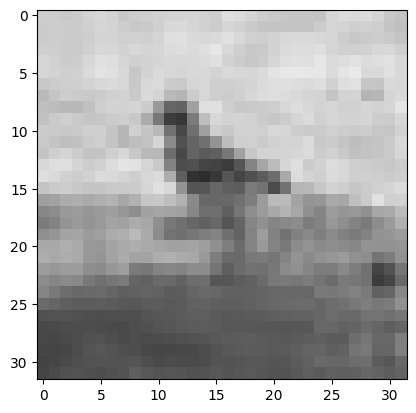

In [ ]:
plt.imshow(train_imgs[0].astype("uint8"))
#plt.title(classes[labels[i]])


# Vision Transformer

In [ ]:
model_id = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_id)
feature_extractor
processor = ViTImageProcessor.from_pretrained(model_id)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
train_imgs[0]

array([[[205., 205., 205.],
        [204., 204., 204.],
        [201., 201., 201.],
        ...,
        [213., 213., 213.],
        [199., 199., 199.],
        [194., 194., 194.]],

       [[204., 204., 204.],
        [205., 205., 205.],
        [204., 204., 204.],
        ...,
        [206., 206., 206.],
        [196., 196., 196.],
        [192., 192., 192.]],

       [[204., 204., 204.],
        [205., 205., 205.],
        [204., 204., 204.],
        ...,
        [205., 205., 205.],
        [201., 201., 201.],
        [196., 196., 196.]],

       ...,

       [[ 69.,  69.,  69.],
        [ 68.,  68.,  68.],
        [ 70.,  70.,  70.],
        ...,
        [101., 101., 101.],
        [101., 101., 101.],
        [128., 128., 128.]],

       [[ 67.,  67.,  67.],
        [ 70.,  70.,  70.],
        [ 74.,  74.,  74.],
        ...,
        [ 92.,  92.,  92.],
        [ 87.,  87.,  87.],
        [104., 104., 104.]],

       [[ 69.,  69.,  69.],
        [ 75.,  75.,  75.],
        [ 81.,  

In [ ]:
def process_example(example):
    inputs = feature_extractor(np.array(example), return_tensors='pt')
    inputs['label'] = train_labels[0]
    return inputs

In [ ]:
process_example(train_imgs[0])

{'pixel_values': tensor([[[[ 0.6078,  0.6078,  0.6078,  ...,  0.5216,  0.5216,  0.5216],
          [ 0.6078,  0.6078,  0.6078,  ...,  0.5216,  0.5216,  0.5216],
          [ 0.6078,  0.6078,  0.6078,  ...,  0.5216,  0.5216,  0.5216],
          ...,
          [-0.4588, -0.4588, -0.4588,  ..., -0.2235, -0.2235, -0.2235],
          [-0.4588, -0.4588, -0.4588,  ..., -0.2235, -0.2235, -0.2235],
          [-0.4588, -0.4588, -0.4588,  ..., -0.2235, -0.2235, -0.2235]],

         [[ 0.6078,  0.6078,  0.6078,  ...,  0.5216,  0.5216,  0.5216],
          [ 0.6078,  0.6078,  0.6078,  ...,  0.5216,  0.5216,  0.5216],
          [ 0.6078,  0.6078,  0.6078,  ...,  0.5216,  0.5216,  0.5216],
          ...,
          [-0.4588, -0.4588, -0.4588,  ..., -0.2235, -0.2235, -0.2235],
          [-0.4588, -0.4588, -0.4588,  ..., -0.2235, -0.2235, -0.2235],
          [-0.4588, -0.4588, -0.4588,  ..., -0.2235, -0.2235, -0.2235]],

         [[ 0.6078,  0.6078,  0.6078,  ...,  0.5216,  0.5216,  0.5216],
          [ 0

In [ ]:
ds = Dataset.from_dict({"image": torch.Tensor(train_imgs), "label": train_labels})
#ds = ds.with_format()
ds

Dataset({
    features: ['image', 'label'],
    num_rows: 80000
})

In [ ]:
def preprocess(batch):
    # take a list of PIL images and turn them to pixel values
    inputs = feature_extractor(np.array(batch['image']),
        return_tensors='pt'
    )
    # include the labels
    inputs['label'] = batch['label']
    return inputs

In [ ]:
prepared_train = ds.with_transform(preprocess)

In [ ]:
prepared_train#[0:2]

Dataset({
    features: ['image', 'label'],
    num_rows: 80000
})

In [ ]:
ds_val = Dataset.from_dict({"image": torch.Tensor(val_imgs), "label": val_labels})

ds_val

Dataset({
    features: ['image', 'label'],
    num_rows: 20000
})

In [ ]:
prepared_val = ds_val.with_transform(preprocess)

In [ ]:
prepared_val#[0:2]

Dataset({
    features: ['image', 'label'],
    num_rows: 20000
})

In [ ]:
def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['label'] for x in batch])
    }

In [ ]:
# accuracy metric
metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1),references=p.label_ids)

<ipython-input-26-1addffa55e44>:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:756: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [ ]:
model = ViTForImageClassification.from_pretrained(
    model_id,  # classification head
    num_labels=len(classes)
)

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir="./vit-cifake",
    per_device_train_batch_size=16,
    evaluation_strategy="steps",
    num_train_epochs=4,
    save_steps=1000,
    eval_steps=1000,
    logging_steps=10,
    learning_rate=1e-4,
    save_total_limit=2,
    remove_unused_columns=False,
    push_to_hub=False,
    report_to='tensorboard',
    load_best_model_at_end=True,
)

In [ ]:


trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_train,
    eval_dataset=prepared_val,
    tokenizer=feature_extractor,
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
train_results = trainer.train()
# save tokenizer with the model
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)

# save the trainer state
trainer.save_state()

Step,Training Loss,Validation Loss,Accuracy
1000,0.133500,0.097906,0.965300
2000,0.188000,0.071309,0.974850
3000,0.134200,0.071127,0.977450
4000,0.139300,0.061523,0.978600
5000,0.098600,0.152437,0.956550
6000,0.025900,0.059209,0.982300
7000,0.077000,0.050916,0.984100
8000,0.016200,0.070730,0.979500
9000,0.046600,0.050848,0.983800
10000,0.084100,0.057984,0.984450


***** train metrics *****
  epoch                    =           4.0
  total_flos               = 23094412569GF
  train_loss               =        0.0403
  train_runtime            =    6:01:45.39
  train_samples_per_second =        14.743
  train_steps_per_second   =         0.921


In [ ]:
metrics = trainer.evaluate(prepared_val)
trainer.log_metrics("val", metrics)
trainer.save_metrics("val", metrics)

***** val metrics *****
  epoch                   =        4.0
  eval_accuracy           =     0.9916
  eval_loss               =      0.041
  eval_runtime            = 0:06:29.89
  eval_samples_per_second =     51.296
  eval_steps_per_second   =      6.412


# Model Results on Test Set

In [40]:
ds_test = Dataset.from_dict({"image": torch.Tensor(test_imgs), "label": test_labels})
ds_test

Dataset({
    features: ['image', 'label'],
    num_rows: 20000
})

In [41]:
prepared_test = ds_test.with_transform(preprocess)
prepared_test#[0:2]

Dataset({
    features: ['image', 'label'],
    num_rows: 20000
})

In [42]:
metrics = trainer.evaluate(prepared_test)
trainer.log_metrics("test", metrics)
trainer.save_metrics("test", metrics)

***** test metrics *****
  epoch                   =        4.0
  eval_accuracy           =     0.9903
  eval_loss               =     0.0475
  eval_runtime            = 0:06:30.57
  eval_samples_per_second =     51.207
  eval_steps_per_second   =      6.401


In [43]:
predictions_test = trainer.predict(prepared_test)
predictions_test

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
y_test_preds = [np.argmax(x) for x in predictions_test.predictions]
y_test_preds = np.array(y_test_preds)
y_test_preds

In [62]:
y_test_preds = np.array(y_test_preds)

In [63]:
print(classification_report(y_true = test_labels, y_pred = y_test_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10000
           1       0.99      0.99      0.99     10000

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



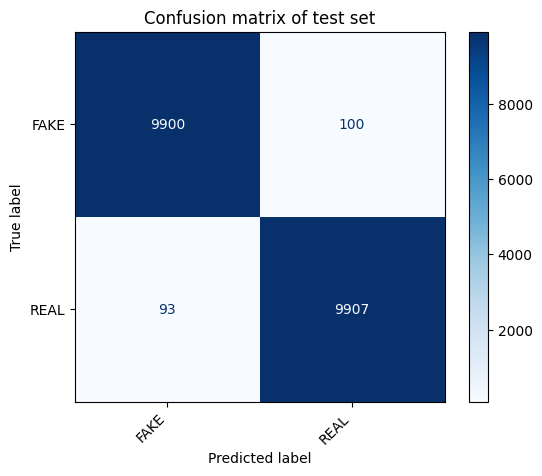

In [64]:
ConfusionMatrixDisplay.from_predictions(y_true = test_labels, y_pred = y_test_preds, display_labels=classes, cmap='Blues')

plt.title('Confusion matrix of test set')
plt.xticks(rotation=45, ha='right')
plt.show();